<h1>PROJETO DE GOVERNANÇA EM TI</h1>
<h5>Por Gabriela Rodrigues Silva e Nino Vittorio Arcuri <h5>

<h1> Introdução</h1>

Projeto focado em aplicar os conceitos aprendidos durante as aulas de Ciência de Dados. Com o objetivo de desenvolvendo um programa onde Análise de Dados sobre Acidentes Aéreos Ocorridos no Brasil de 2010 a 2019 aplicando técnicas de ciência de dados.

# Bibliotecas

In [ ]:
%matplotlib inline
import pandas as pd  #Para criação de DataFrames
import matplotlib.pyplot as plt 
import random

from collections import Counter
import statistics as static

import numpy as np

# Matplotlib 
Esse comando serve para plotar os gráficos estáticos logo abaixo da célula, existem outras configurações do %matplolib que podem mostrar os gráficos em outras abas ou gráficos dinâmicos.

# Pandas 
Pandas é um biblioteca para manipulação e análise de dados, escrita em Python. Essa é a biblioteca perfeita para iniciar suas análises exploratórias de dados, pois ela nos permite ler, manipular, agregar e plotar os dados em poucos passos.

# Matplotlib.pyplot
O Matplotlib é uma biblioteca para a visualização de dados em Python. Ele apresenta uma API orientada a objetos que permite a criação de gráficos em 2D de uma forma simples e com poucos comandos.

# Random
random é um módulo que faz parte da linguagem Python e é utilizado para gerar números pseudo-aleatórios. Também podemos selecionar os elementos de uma lista de forma aleatória ou exibir o seu resultado embaralhado.

# Collections counter

Um Counter é uma subclasse de dict subclass para contagem de objetos hasheáveis. É uma coleção na qual elementos são armazenados como chaves de dicionário e suas contagens são armazenadas como valores de dicionário. Contagens podem ser qualquer valor inteiro incluindo zero e contagens negativas. A classe Counter é similar a sacos ou multiconjuntos em outras linguagens **PYTHON**

# Stattistics

Esse módulo fornece funções para o cálculo de estatísticas matemáticas de dados numéricos (para valores do tipo Real ).

#Static

É um método estático dentro de uma classe indica que este método pode ser invocado sem a necessidade de que você tenha uma instância desta classe.

# Leitura do dataset
Os datasets são bases de dados específicas que servem de amostras para treinamentos de algoritmos de inteligência artificial ou para outros tipos de projetos de Data Science.

In [ ]:
df_ocorrencias = pd.read_csv('https://raw.githubusercontent.com/GabrielaRodriguesSilva/dataset-acidentes-aereos/main/ocorrencias_cenipa.csv')

In [ ]:
print('O arquivo ocorrencias_cenipa.csv\ que possui : ' + str(df_ocorrencias.shape[0]) + ' linhas e ' + str(df_ocorrencias.shape[1]) + ' colunas') 

O arquivo ocorrencias_cenipa.csv\ que possui : 5242 linhas e 21 colunas


<h2>Tratando os dados</h2>

Realizaremos a formatação dos dados. Vamos verificar como a tabela do arquivo <a>"ocorrencias_cenipa.csv"</a> é apresentada.

In [ ]:
df_ocorrencias.head(5)

,codigo,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,...,ocorrencia_saida_pista,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano
0,40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,2010-01-12,2010,14:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7,1977,BRASIL,POUSO,LEVE
1,40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,2010-04-08,2010,14:20:00,SIM,FINALIZADA,...,SIM,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6,1997,BRASIL,POUSO,SUBSTANCIAL
2,40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,2010-03-19,2010,19:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1962,BRASIL,APROXIMAÇÃO FINAL,SUBSTANCIAL
3,40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,2010-03-21,2010,20:45:00,SIM,FINALIZADA,...,NÃO,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2,1974,BRASIL,DECOLAGEM,DESTRUÍDA
4,40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,2010-03-10,2010,17:20:00,SIM,FINALIZADA,...,NÃO,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6,1974,BRASIL,POUSO,LEVE


Acima podemos ver como o arquivo está estruturado. O arquivo "ocorrencias_cenipa.csv" contém 5242 linhas e 21 colunas.


In [ ]:
df_ocorrencias.info


<bound method DataFrame.info of       codigo             tipo  \
0      40107         ACIDENTE   
1      40147         ACIDENTE   
2      40148         ACIDENTE   
3      40149         ACIDENTE   
4      40150  INCIDENTE GRAVE   
...      ...              ...   
5237   79117         ACIDENTE   
5238   79119         ACIDENTE   
5239   79123         ACIDENTE   
5240   79203        INCIDENTE   
5241   79227         ACIDENTE   

                                              descricao  \
0     COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO   
1     FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...   
2                                             PANE SECA   
3                                 FALHA DO MOTOR EM VOO   
4                                     COM TREM DE POUSO   
...                                                 ...   
5237                                      INDETERMINADO   
5238                                      INDETERMINADO   
5239                                    

Podemos ver, depois do comando ```Info``` todas as informação que encotramos nesse dataset...

In [ ]:
df_ocorrencias.dtypes

codigo                        int64
tipo                         object
descricao                    object
cidade                       object
estado                       object
data                         object
ano                           int64
hora                         object
aeronave_liberada            object
status_investigacao          object
aeronaves_envolvidas          int64
ocorrencia_saida_pista       object
aeronave_tipo                object
aeronave_fabricante          object
motor_tipo                   object
aeronave_motor_quantidade    object
aeronave_assentos             int64
aeronave_ano_fabricacao       int64
aeronave_pais_fabricante     object
aeronave_fase_operacao       object
aeronave_nivel_dano          object
dtype: object

Podemos ver, depois do comando ```dtypes``` os tipos que temos nessa dataset que são eles : (int64) que ser refere a inteiro , o (object) que é string.

In [ ]:
#Colunas do arquivo 
df_ocorrencias.columns

Index(['codigo', 'tipo', 'descricao', 'cidade', 'estado', 'data', 'ano',
       'hora', 'aeronave_liberada', 'status_investigacao',
       'aeronaves_envolvidas', 'ocorrencia_saida_pista', 'aeronave_tipo',
       'aeronave_fabricante', 'motor_tipo', 'aeronave_motor_quantidade',
       'aeronave_assentos', 'aeronave_ano_fabricacao',
       'aeronave_pais_fabricante', 'aeronave_fase_operacao',
       'aeronave_nivel_dano'],
      dtype='object')

# DataFrame
É semelhante a uma matriz mas as suas colunas têm nomes e podem conter dados de tipo diferente. Um _DataFrame_ pode ser visto como uma tabela de uma base de dados, em que cada linha corresponde a um registo (linha) da tabela.

In [ ]:
#Retirando as colunas que não serão usadas
df_ocorrencias.drop(['aeronave_liberada','aeronave_ano_fabricacao','aeronaves_envolvidas','aeronave_fabricante',
                     'aeronave_motor_quantidade','aeronave_assentos','aeronave_pais_fabricante',], axis = 1, inplace = True)

In [ ]:
#Colunas do arquivo 'ocorrencias_cenipa.csv'
df_ocorrencias.columns

Index(['codigo', 'tipo', 'descricao', 'cidade', 'estado', 'data', 'ano',
       'hora', 'status_investigacao', 'ocorrencia_saida_pista',
       'aeronave_tipo', 'motor_tipo', 'aeronave_fase_operacao',
       'aeronave_nivel_dano'],
      dtype='object')

A fim de deixa a leitura eo entendimento mais nítido , vamos renomea os nomes das colunas e adiciona mas uma coluna para realizar contas.

In [ ]:
#Renomeando colunas do dataset df_ocorrencias
df_ocorrencias.columns = ['Código da Ocorrência', 'Tipo', 'Descrição', 'Cidade', 'UF', 'Data', 'Ano',
                          'Horario','Status','Saida Pista', 
                          'Tipo de Aeronave', 'Tipo de Motor','Fase de Operação','Nivel de dano']

#Inserindo coluna para contagem
df_ocorrencias['Contagem'] = 1

In [ ]:
#Colunas do arquivo 'ocorrencias_cenipa.csv'
df_ocorrencias.columns

Index(['Código da Ocorrência', 'Tipo', 'Descrição', 'Cidade', 'UF', 'Data',
       'Ano', 'Horario', 'Status', 'Saida Pista', 'Tipo de Aeronave',
       'Tipo de Motor', 'Fase de Operação', 'Nivel de dano', 'Contagem'],
      dtype='object')

Removeremos as linhas em que o campo Código da Ocorrência está inválido.


In [ ]:
#Remover as colunas onde o código da ocorrência é inválido
df_ocorrencias['Código da Ocorrência'].dropna(axis = 0, inplace = True)

Verificaremos como ficou nosso novo DataFrame.

In [ ]:
df_ocorrencias.head(5)

,Código da Ocorrência,Tipo,Descrição,Cidade,UF,Data,Ano,Horario,Status,Saida Pista,Tipo de Aeronave,Tipo de Motor,Fase de Operação,Nivel de dano,Contagem
0,40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,2010-01-12,2010,14:30:00,FINALIZADA,NÃO,AVIÃO,PISTÃO,POUSO,LEVE,1
1,40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,2010-04-08,2010,14:20:00,FINALIZADA,SIM,AVIÃO,PISTÃO,POUSO,SUBSTANCIAL,1
2,40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,2010-03-19,2010,19:30:00,FINALIZADA,NÃO,AVIÃO,PISTÃO,APROXIMAÇÃO FINAL,SUBSTANCIAL,1
3,40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,2010-03-21,2010,20:45:00,FINALIZADA,NÃO,AVIÃO,PISTÃO,DECOLAGEM,DESTRUÍDA,1
4,40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,2010-03-10,2010,17:20:00,FINALIZADA,NÃO,AVIÃO,PISTÃO,POUSO,LEVE,1


<h1>Visualização dos Dados </h1>

Nosso DataFrame está mais limpo e apresentável. Agora, vamos realizar algumas formatação em torno dos dados contidos aqui em formato de graficos.



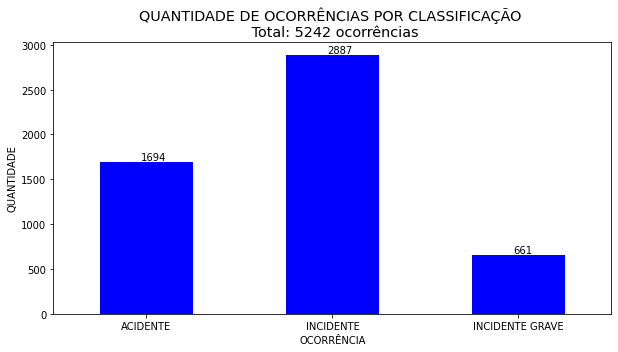

In [ ]:
tipo = df_ocorrencias.groupby('Tipo')['Contagem'].sum().plot(kind='bar', figsize=(10,5),color='b')
plt.style.use("ggplot")
for p in tipo.patches:
    b=p.get_bbox()
    tipo.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

plt.xticks(rotation=0)
plt.title('QUANTIDADE DE OCORRÊNCIAS POR CLASSIFICAÇÃO \n Total: ' + str(df_ocorrencias['Contagem'].sum()) + ' ocorrências')
plt.xlabel('OCORRÊNCIA')
plt.ylabel('QUANTIDADE')
plt.show()

Como podemos ver no gráfico, as ocorrências são divididas em 3 principais classificações: Acidente, Incidente Ocorrência e Incidente Grave. 

Tendo um total de 5242 de ocorrências, sendo o Incidente Ocorrência com mais ocorrências com um total de 2887, logo depois o Acidente e Incidente Grave
com 1694 e 661 ocorrências.


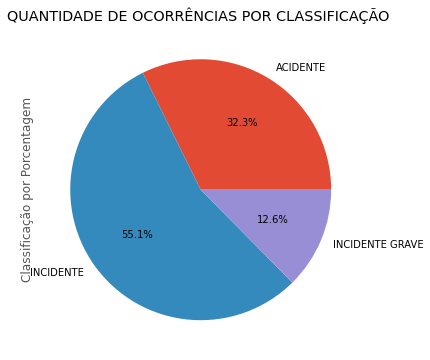

In [ ]:
#Visualizando percentual com o gráfico de Pizza
percentual = df_ocorrencias.groupby('Tipo')['Contagem'].sum().plot(kind='pie',autopct='%1.1f%%' ,label="Classificação por Porcentagem" ,figsize=(6, 6))
plt.title('QUANTIDADE DE OCORRÊNCIAS POR CLASSIFICAÇÃO ')
plt.show()

Podemos observar que incidentes, menos grave, são os tipos de ocorrência mais comum, com 55,1% do total.

Incidentes graves representa 12,6% e os acidentes, 32,3% do total.

<h1>Ocorrências por estado 2010-2019</h1>

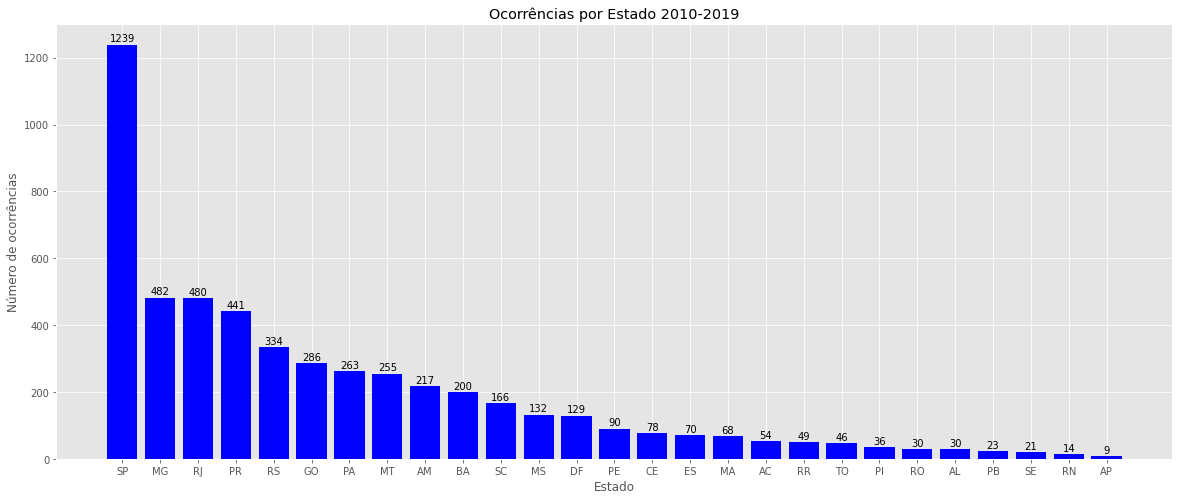

In [ ]:
estado = Counter(df_ocorrencias['UF'])
fase_estado = sorted(estado, key = estado.get,)
contador_estado = sorted(list(estado.values()))

plt.style.use("ggplot")
fig,uf = plt.subplots(figsize=(20, 8))

x=fase_estado
y=contador_estado

v=uf.bar(x,y,color='b')
uf.invert_xaxis()

for a in v:
        height = a.get_height()
        uf.annotate('{}'.format(height), xy=(a.get_x() + a.get_width() / 2, height), xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center')

plt.title('Ocorrências por Estado 2010-2019')
plt.xlabel("Estado")
plt.ylabel("Número de ocorrências")
plt.show()

Ao analizar os dados por Ocorrências por estado, tivemos um resultado um pouco inpresionante pricipalmente com o estado de **São Paulo** com um pouco mais que o  doblo de ocorrências com o tatal de 1239 em coparação com o segundo lugar que e **Minas Gerais** com um total de 482 de ocorrências.  

<h1>QUANTIDADE DE OCORRÊNCIAS POR ANO</h1>

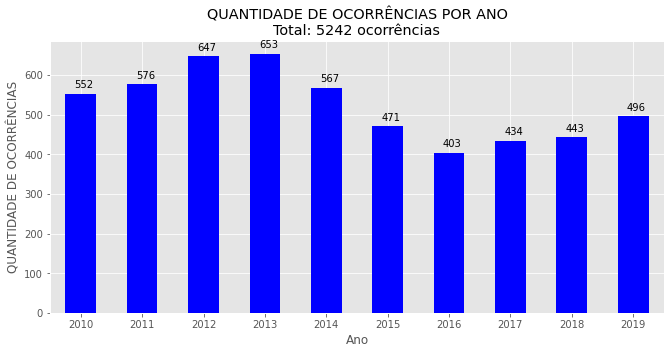

In [ ]:
ano =  df_ocorrencias.groupby('Ano')['Contagem'].sum().plot(kind='bar',color='b', figsize=(11,5))

for p in ano.patches:
    b=p.get_bbox()
    ano.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.1, b.y1 + 15))

plt.title('QUANTIDADE DE OCORRÊNCIAS POR ANO\nTotal: ' + str(df_ocorrencias['Contagem'].sum()) + ' ocorrências')
plt.xlabel('Ano')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.xticks(rotation=0)
plt.show()

Com um total de 5242 ocorrências, podemos ver as quantidade de acidentes que cada ano teve entre os anos de 2010 a 2019,  e com isso descobrimos que o ano de **2013** foi o ano que teve mais ocorrências com um total de 653, seguido dos anos de **2012** e **2011**



#5 Cidades com mais e menos ocorrências 2010-2019

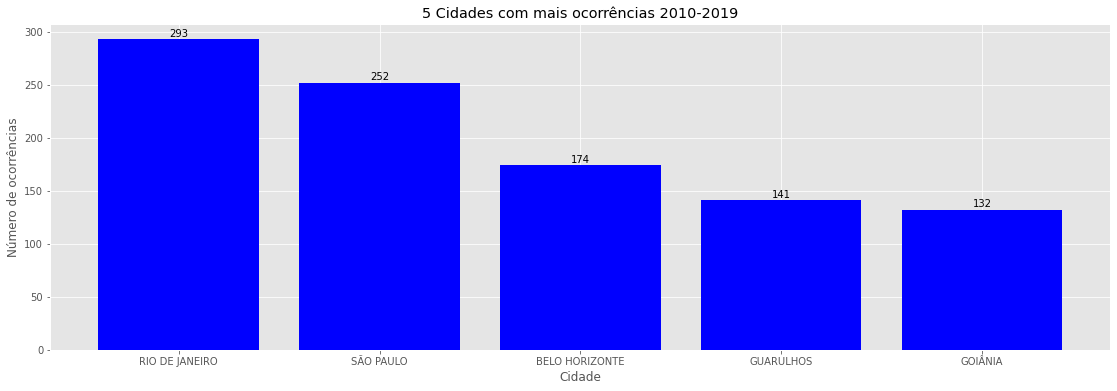

In [ ]:
cidade = Counter(df_ocorrencias['Cidade'])
cidade1 = sorted(cidade, key = cidade.get, reverse = True)
cidade2 = sorted(list(cidade.values()), reverse = True)

plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(19, 6))

x=cidade1[:5]
y=cidade2[:5]

v = ax.bar(x, y,color='b')
for rect in v:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center')

plt.title('5 Cidades com mais ocorrências 2010-2019') 
plt.xlabel('Cidade')
plt.ylabel("Número de ocorrências")
plt.show()

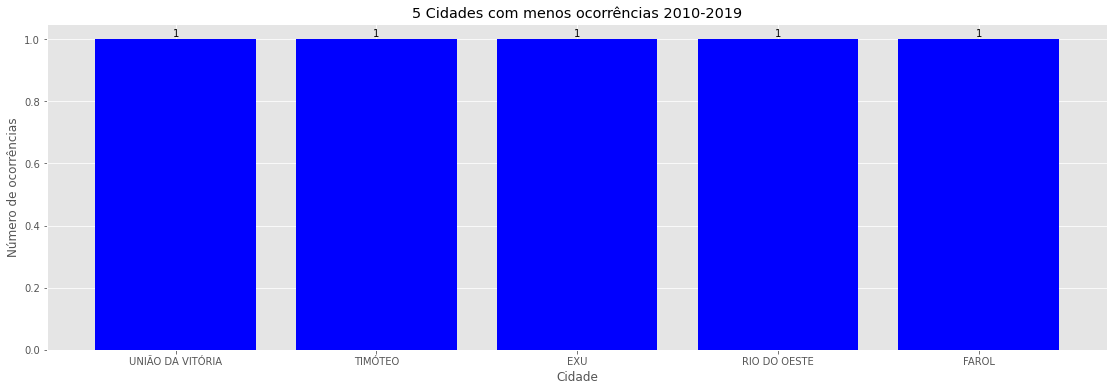

In [ ]:
cidade = Counter(df_ocorrencias['Cidade'])
cidade1 = sorted(cidade, key = cidade.get, reverse = False)
cidade2 = sorted(list(cidade.values()), reverse = False)

plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(19, 6))

x=cidade1[:5]
y=cidade2[:5]

v = ax.bar(x, y,color='b')
for rect in v:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center')
plt.title('5 Cidades com menos ocorrências 2010-2019') 
plt.xlabel('Cidade')
plt.ylabel("Número de ocorrências")
plt.show()

Ao analiza as ocorrências de 2010-2019 de todas as cidades com mais ocorrências
obtemos as 5 primeiro sendo elas : Rio de Janeiro com **293** , São Paulo com **252**,Belo Horizonte com **174**, Guarulhos com **141** e Goiania com **132**.

Já com as 5 cidades com menos ocorrências temos as cidaes: União da Vitória, Timoteo,Exu,Rio do Oeste e Farol ai todas essa cidade conta só com **1** ocorrências 




#Fases do voo com mais ocorrências

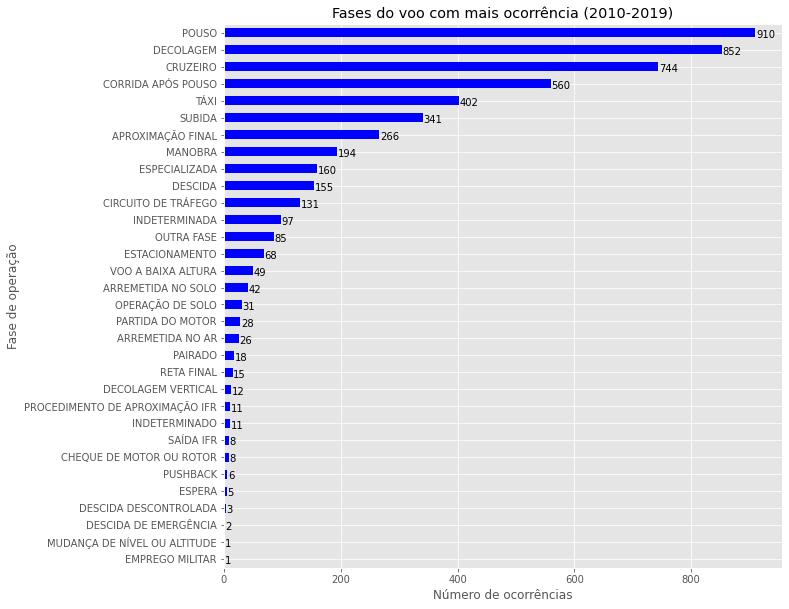

In [ ]:
fases = df_ocorrencias.groupby('Fase de Operação')['Contagem'].sum().sort_values().plot(kind='barh',color='b', figsize=(10,10))

for p in fases.patches:
    b=p.get_bbox()
    fases.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))

plt.title('Fases do voo com mais ocorrência (2010-2019)')
plt.xlabel('Número de ocorrências')
plt.ylabel("Fase de operação")
plt.show()

Ao classifica as ocorrência por fases do voo, obtemos 32 fase destitas, tendo a fase do **Pouso** com a maio quantidade de ocorrência, seguido da **Decolagem** e **Cruzeiro**.

#Principais ocorrências 2010-2019

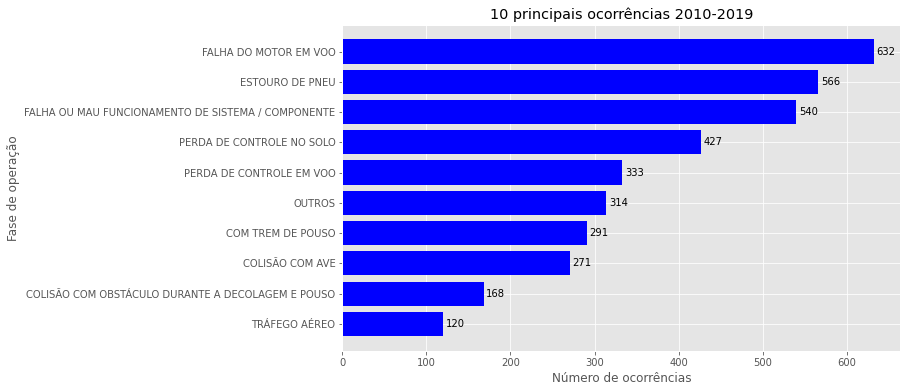

In [ ]:
Descrição = Counter(df_ocorrencias['Descrição'])
fase = sorted(Descrição, key = Descrição.get, reverse = True)
contador= sorted(list(Descrição.values()), reverse = True)

plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(10, 6))

x=fase[:10]
y=contador[:10]

plt.barh(x, y, color='b')
ax.invert_yaxis()

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')



plt.title('10 principais ocorrências 2010-2019')
plt.xlabel('Número de ocorrências')
plt.ylabel("Fase de operação")
plt.show()

As principais ocorrências ocorrem por conta da **Falha do Motor** em voo com 632 episódio, seguido de **Estouro de Pneu** com 566 episódio e **Falha de Sistema** com 540 episódio. 

#Ocorrências por tipo de motor


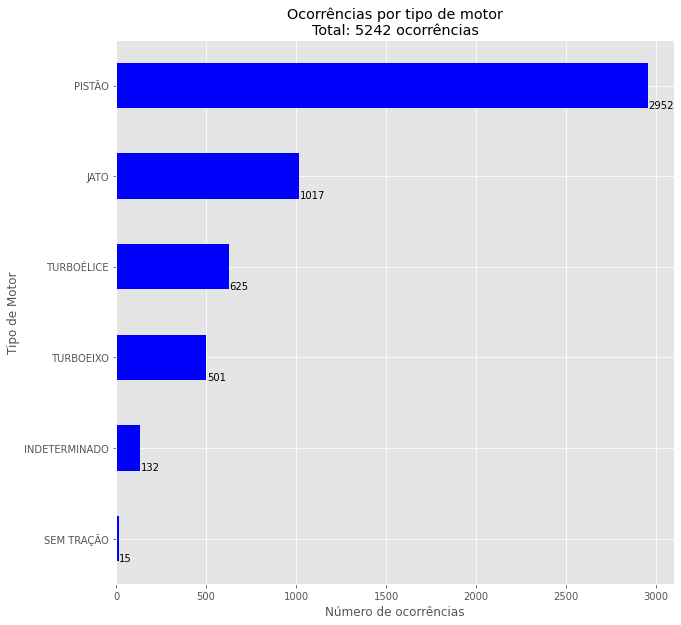

In [ ]:
moto = df_ocorrencias.groupby('Tipo de Motor')['Contagem'].sum().sort_values().plot(kind='barh',color='b', figsize=(10,10))
for p in moto.patches:
    b=p.get_bbox()
    moto.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 3, p.get_y() ))

plt.title('Ocorrências por tipo de motor\nTotal: ' + str(df_ocorrencias['Contagem'].sum()) + ' ocorrências')
plt.xlabel('Número de ocorrências')
plt.show()

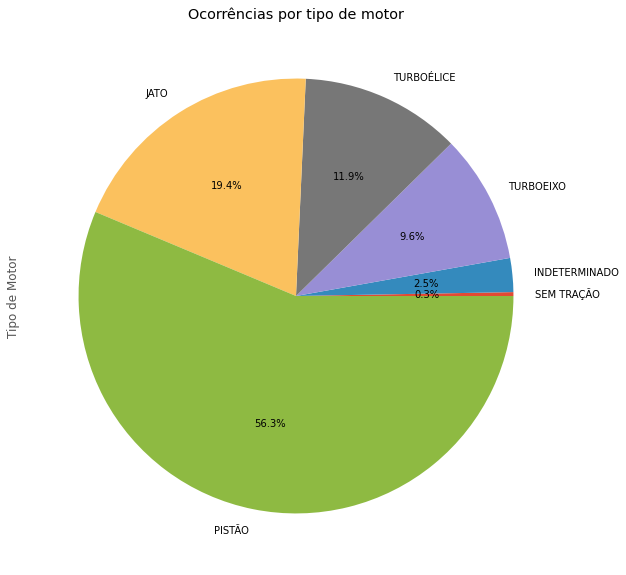

In [ ]:
moto = df_ocorrencias.groupby('Tipo de Motor')['Contagem'].sum().sort_values().plot(kind='pie',autopct='%1.1f%%' ,label='Tipo de Motor', figsize=(10,10))
plt.title('Ocorrências por tipo de motor')
plt.show()

O **motor** que mais ocorre acidentes é o **_Pistão_** com uma porcentagem de 56.3% do total de evento, logo depois dele vem o motor a **_Jato_** com 19.4%.

#Percentual de Ocorrência por Saída de Pista

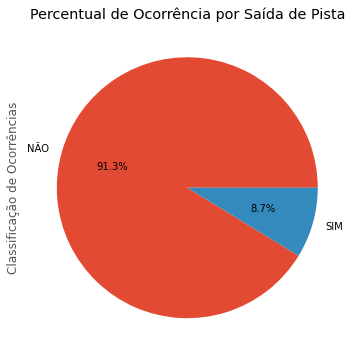

In [ ]:
percentual = df_ocorrencias.groupby('Saida Pista')['Contagem'].sum().plot(kind='pie',autopct='%1.1f%%' ,label="Classificação de Ocorrências" ,figsize=(6, 6))
plt.title('Percentual de Ocorrência por Saída de Pista')
plt.show()

O maior percentual de ocorrência não acontencem por saída de pista. 

#Tipo de Aeronave por Ocorrência

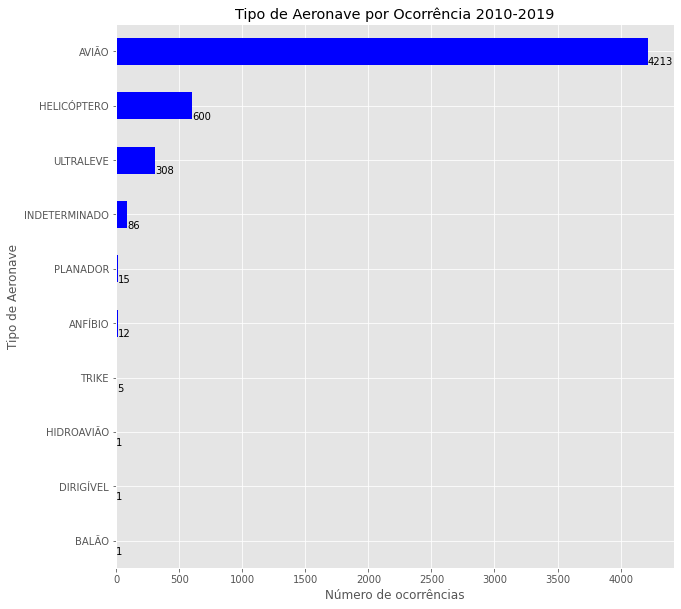

In [ ]:
aeronave = df_ocorrencias.groupby('Tipo de Aeronave')['Contagem'].sum().sort_values().plot(kind='barh',color='b', figsize=(10,10))

for p in aeronave.patches:
    b=p.get_bbox()
    aeronave.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() ))

plt.xlabel("Número de ocorrências")
plt.title('Tipo de Aeronave por Ocorrência 2010-2019')
plt.show()

Os acidentes que mais são causados são pelos **_Aviões_** com um total de 4213 episódio e os menos são por **_Balões_** , **_Dirigíveis_** e **_Hidroavião_** com só 1 episódio cada.

# Pricinpais Horários das Ocorrências

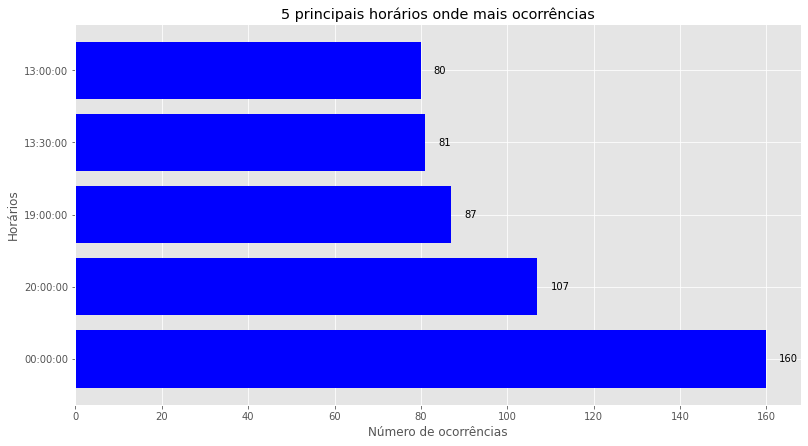

In [ ]:
hora = Counter(df_ocorrencias['Horario'])
fase = sorted(hora, key = hora.get, reverse = True)
con = sorted(list(hora.values()), reverse = True)

fig,ax = plt.subplots(figsize=(13, 7))

x=fase[:5]
y=con[:5]

ax.barh(x, y, color='b')

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')
    
plt.title('5 principais horários onde mais ocorrências')   
plt.xlabel('Número de ocorrências')
plt.ylabel('Horários')
plt.show()

Ao pesquisa os 5 principais horários que mais ocorre os acidentes, temos que a anoite e pricipalmente a meia noite e a hora que mais temos ocorrências. 

#OCORRÊNCIAS AGRUPADAS POR TIPO DE DANO

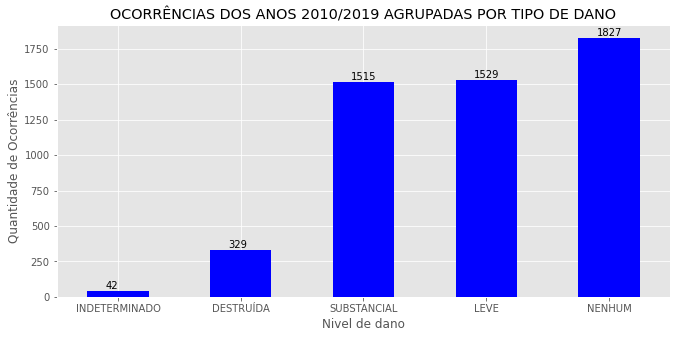

In [ ]:
danos = df_ocorrencias.groupby('Nivel de dano')['Contagem'].sum().sort_values().plot(kind='bar',color='b', figsize=(11,5),)

for p in danos.patches:
    a=p.get_bbox()
    danos.annotate("{:.0f}".format(a.y1 + a.y0), ((a.x0 + a.x1)/2 - 0.1, a.y1 + 15))

plt.title('OCORRÊNCIAS DOS ANOS 2010/2019 AGRUPADAS POR TIPO DE DANO')
plt.ylabel('Quantidade de Ocorrências')
plt.xticks(rotation=0)
plt.show()

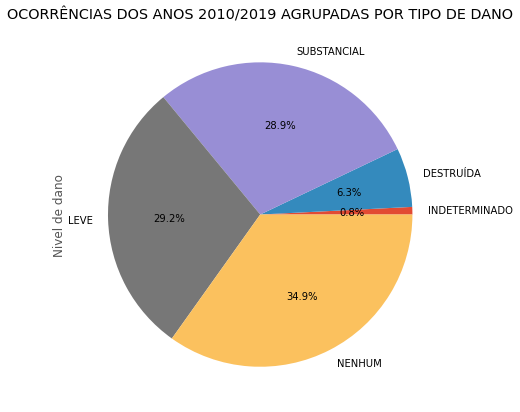

In [ ]:
danos = df_ocorrencias.groupby('Nivel de dano')['Contagem'].sum().sort_values().plot(kind='pie',autopct='%1.1f%%',label='Nivel de dano', figsize=(8,7))
plt.title('OCORRÊNCIAS DOS ANOS 2010/2019 AGRUPADAS POR TIPO DE DANO')
plt.show()

A pois analizar os dos graficos com o grafico de barra e o de pizza, podemos ver os niveis de danos e dividido em 5 niveis, sendo o nivel: **Nenhum** com o maio quantideda de eventos tendo 1827 ou 34.9% dos totas de caso.

#Status da Investigação dos anos 2010-2019

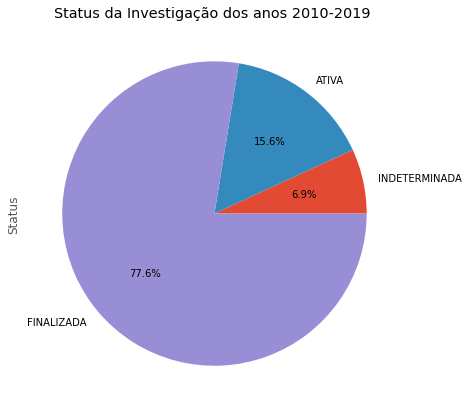

In [ ]:
status = df_ocorrencias.groupby('Status')['Contagem'].sum().sort_values().plot(kind='pie',autopct='%1.1f%%',label='Status', figsize=(8,7))
plt.title('Status da Investigação dos anos 2010-2019 ')
plt.show()

Notamos que a maior parte das ocorrências ser encotra com o status de **_finalizada_** com 77.6%, os casos com o **_ativos_** representa 15.6% e os **_indeterminada_** reflete 6.9% do todo.

# Considerações Finais 

Utilizamos dados abertos disponibilizados pela CENIPA - Centro de Investigação e Prevenção de Acidentes aeronáuticos. O arquivos com tem  informações sobre ocorrências envolvendo aeronaves dos anos de 2010 a 2019 que ocorreram em solo brasileiro. 


---


Aviões e aeronaves também não estão imunes a acidentes e problemas. Centenas de mortes e milhares de incidentes são registrados ao longo da história. No entanto, vale lembrar que, embora o impacto de um acidente de avião seja grande, ainda é muito improvável.

# Referências Bibliográficas

https://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira

https://docs.python.org/3/library/index.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html

https://matplotlib.org/